In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-6'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-6


**Plot ‘typical’ hydraulic conductivity for sand, silt loam and clay soil as a function of water potential using data from Table 6.1 and eqn (6.34). Use a log–log scale and plot both saturated and unsaturated conductivity. Use the graphs to determine the water potential at which water would flow from silt loam into sand in a layered profile with infiltration.**

In [2]:
import numpy as np

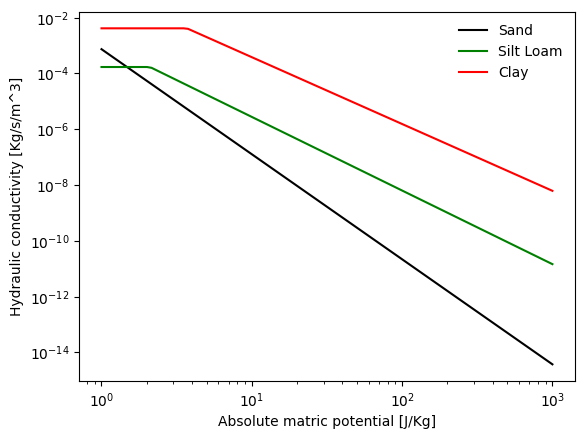

In [ ]:
#For sand soil
psi_s=-0.7 #[J kg–1]
dgs=211.11 #[μm]
bs=1.7
#For silt loam soil
psi_sl=-2.1 #[J kg–1]
dgsl=10.53 #[μm]
bsl=4.7
#For clay soil
psi_c=-3.7 #[J kg–1]
dgc=1.55 #[μm]
bc=7.6
theta_s=0.5 #assume for all texture

Ks_sand = 0.07*(theta_s*(1-(-psi_s/33)**(1/bs)))**4 #Eq. 6.34, cm/s
psi = np.logspace(0, 3, 100)
Ksand = np.piecewise(-psi, [-psi< psi_s, -psi >= psi_s], [lambda x: Ks_sand*(psi_s/x)**(2+3/bs), Ks_sand])

Ks_siltloam = 0.07*(theta_s*(1-(-psi_sl/33)**(1/bsl)))**4
psi = np.logspace(0, 3, 100)
Ksiltloam = np.piecewise(-psi, [-psi< psi_sl, -psi >= psi_sl], [lambda x: Ks_siltloam*(psi_sl/x)**(2+3/bsl), Ks_siltloam])

Ks_clay = 0.07 * (theta_s*(1 - (-psi_c/33)**1/bc))**4
psi = np.logspace(0, 3, 100)
Kclay = np.piecewise(-psi, [-psi< psi_c, -psi >= psi_c], [lambda x: Ks_clay*(psi_c/x)**(2+3/bc), Ks_clay])

#print(Ks_sand)
#print(Ks_siltloam)
#print(Ks_clay)
import matplotlib.pyplot as plt
plt.loglog(psi,Ksand, "k")
plt.loglog(psi,Ksiltloam, "g")
plt.loglog(psi,Kclay, "r")
plt.xlabel("Absolute matric potential [J/Kg]")
plt.ylabel("Hydraulic conductivity [Kg/s/m^3]")
plt.legend(['Sand', 'Silt Loam', 'Clay'], frameon=False)
plt.legend
plt.show()

**6.2. Write a Python function to compute saturated hydraulic conductivity from bulk density, silt fraction and clay fraction. Use your program to show how tillage affects hydraulic conductivity (assuming that tillage decreases the bulk density).**


In [ ]:
from PSP_hydraulicConductivity import*
import matplotlib.pyplot as plt

In [50]:
silt = 0.1 # mass fraction of silt (g/g)
clay = 0.1 # mass fraction of clay (g/g)
bulkDensity = [1500,1200,900] # bulk density (kg/m^3)
particle_density = 2650
#K, psi = hydraulicConductivity(silt,clay,bulkDensity)
sand=1-(silt+clay)
theta_s = {}

for i in bulkDensity:
  porosity = 1 - i/particle_density                                              #m^3/m^3
  theta_s[i] = porosity                                                          #m^3/m^3
  dg = np.exp(sand * (5.76) + silt * (2.3) + clay * (-1.96))                   #Equation_2.36
  psi_e = 0.61 * np.log(dg) - 3.9                                              #Equation_5.36
  b = 8.25 - 1.26 * np.log(dg)                                                 #Equation_5.37
  Ks = 0.07 * (theta_s[i] * (1 - (-psi_e/33)**(1/b)))**4                       #Equation_6.34
  print('Ks =', Ks*3600, 'cm/hr')

print(theta_s)

#plt.loglog(psi,K*3600)
#plt.xlabel('-Matric potential (J/kg)')
#plt.ylabel('Hydraulic conductivity (cm/h)')
#plt.show()


Ks = 2.9875638628544854 cm/hr
Ks = 7.550884811316363 cm/hr
Ks = 16.020572473997785 cm/hr
{1500: 0.4339622641509434, 1200: 0.5471698113207547, 900: 0.6603773584905661}


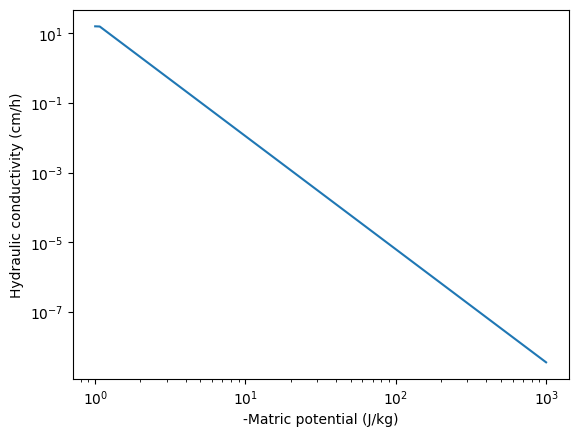

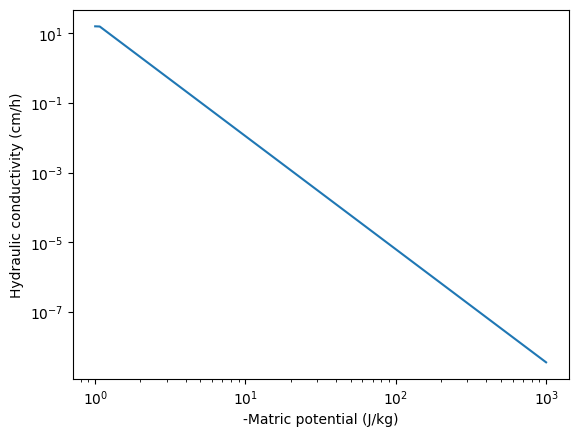

In [54]:

from PSP_hydraulicConductivity import *
silt = 0.1 # mass fraction of silt (g/g)
clay = 0.1 # mass fraction of clay (g/g)
bulkDensity= 1500 # bulk density (kg/m^3)
bulkDensity= 1200 # bulk density (kg/m^3)
bulkDensity= 900 # bulk density (kg/m^3)
K, psi = hydraulicConductivity(silt,clay,bulkDensity)
plt.loglog(psi,K*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()

bulkDensity= 900 # bulk density (kg/m^3)
K, psi = hydraulicConductivity(silt,clay,bulkDensity)
plt.loglog(psi,K*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()



From three graph and calculation we can see, the soil with lower bulk density (900 kg/m3) have greater hydraulic conductivity at the same matric potential compared to soil with 1200 and 1500 kg/m^3.